In [3]:
# download the dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

print("Path to dataset files:", path)

# Downloads the dataset from Kaggle into a local cache directory (usually inside ~/.cache/kagglehub/).
# Returns the path where the dataset is saved.

Path to dataset files: C:\Users\ramku\.cache\kagglehub\datasets\imakash3011\customer-personality-analysis\versions\1


In [8]:
path = r"C:\Users\ramku\.cache\kagglehub\datasets\imakash3011\customer-personality-analysis\versions\1"
file_path = path + r"\marketing_campaign.csv"

import pandas as pd
df = pd.read_csv(file_path)
print(df.head())

  ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0  5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1  2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                                                                      

In [9]:
# doing the necessary imports

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [12]:
df = pd.read_csv(file_path, sep='\t')
# using a separater , as its not a comma separated value dataframe
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [13]:
# Data Cleaning

# 1. Handle missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [14]:
# Drop rows with missing income (only 24 out of 2240)
df = df.dropna(subset=['Income'])

In [15]:
# 2. Convert Dt_Customer to datetime and create customer tenure feature
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
max_date = df['Dt_Customer'].max()
df['Customer_Tenure'] = (max_date - df['Dt_Customer']).dt.days

In [16]:
# 3. Create age feature from Year_Birth
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [17]:
# 4. Create total children feature
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [18]:
# 5. Create total spending feature
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [19]:
# 6. Create total purchases feature
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [20]:
# 7. Create total accepted campaigns
df['Total_Accepted_Cmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                              'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

In [21]:
# 8. Drop unnecessary columns
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [22]:
# Data Exploration

In [24]:
# 1. Basic statistics
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Tenure,Age,Total_Children,Total_Spending,Total_Purchases,Total_Accepted_Cmp
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,0.064079,0.013538,0.009477,0.150271,353.521209,56.179603,0.947202,607.075361,12.557310,0.448556
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,5.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,48.000000,0.000000,69.000000,6.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,0.000000,0.000000,0.000000,0.000000,355.500000,55.000000,1.000000,396.500000,12.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,0.000000,0.000000,0.000000,0.000000,529.000000,66.000000,1.000000,1048.000000,18.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,132.000000,3.000000,2525.000000,32.000000,5.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,0.244950,0.115588,0.096907,0.357417,202.434667,11.985554,0.749062,602.900476,7.204611,0.892440


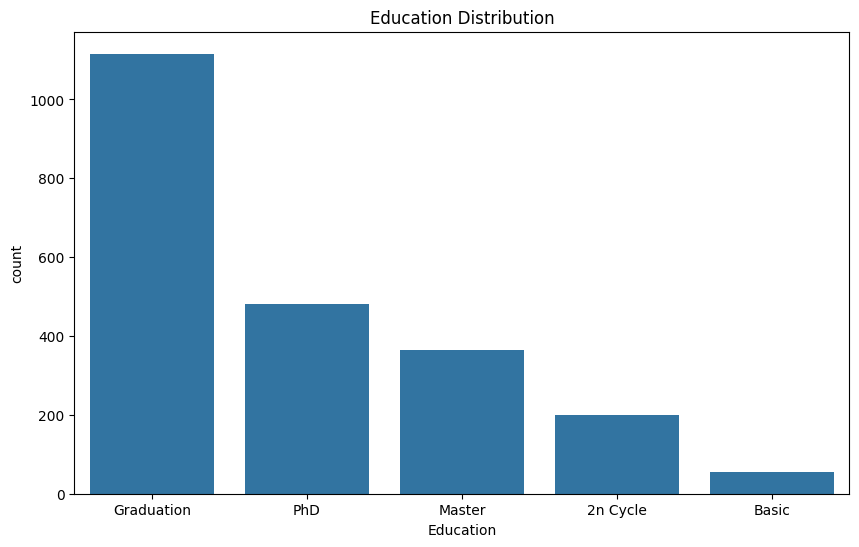

In [25]:
# 2. Education distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index)
plt.title('Education Distribution')
plt.show()

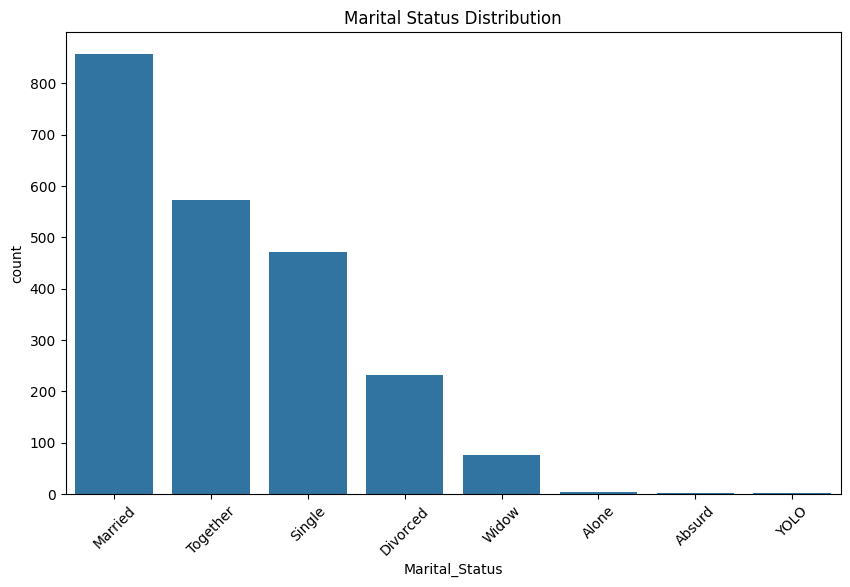

In [26]:
# 3. Marital Status distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status', order=df['Marital_Status'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

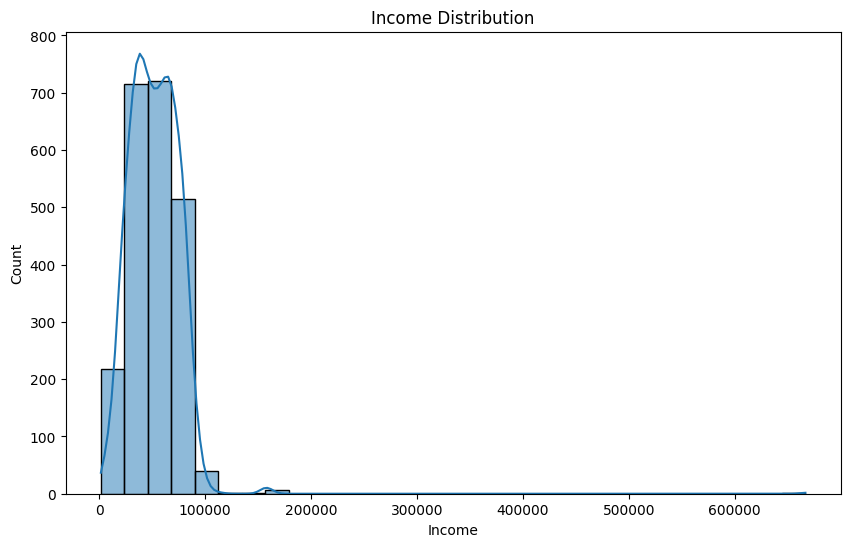

In [27]:
# 4. Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

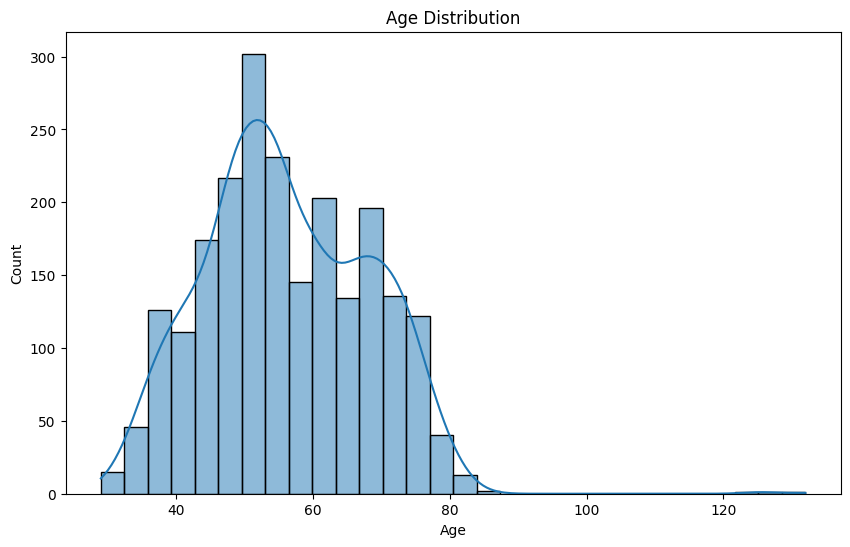

In [28]:
# 5. Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

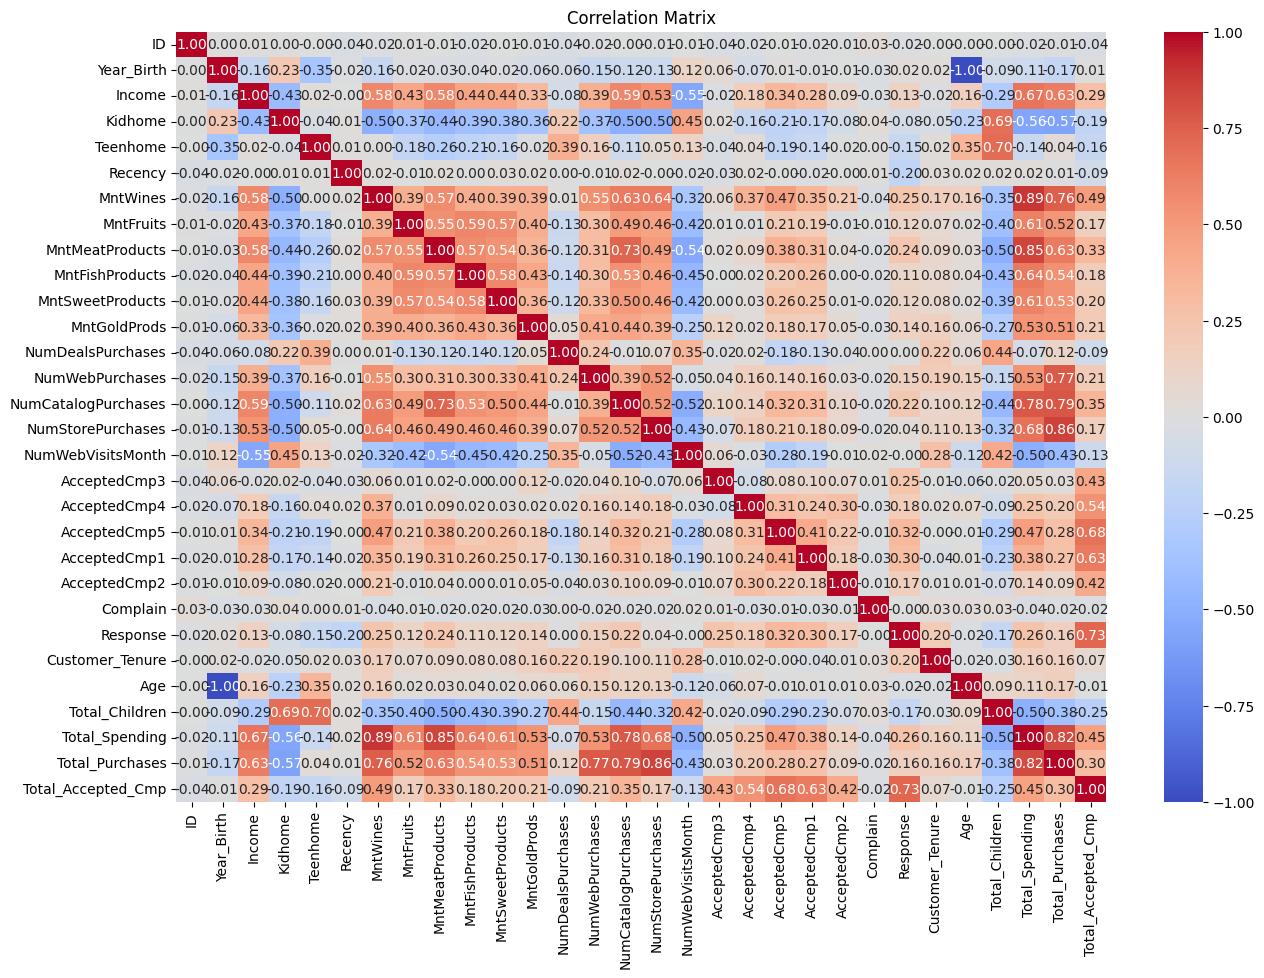

In [29]:
# 6. Correlation matrix
plt.figure(figsize=(15, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [30]:
# Feature Engineering for Clustering


In [31]:
# Select relevant features for clustering
cluster_features = ['Income', 'Total_Spending', 'Total_Purchases', 
                   'Total_Children', 'Customer_Tenure', 'Age', 'Recency']


In [32]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[cluster_features])

In [33]:
# Determine optimal number of clusters using Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

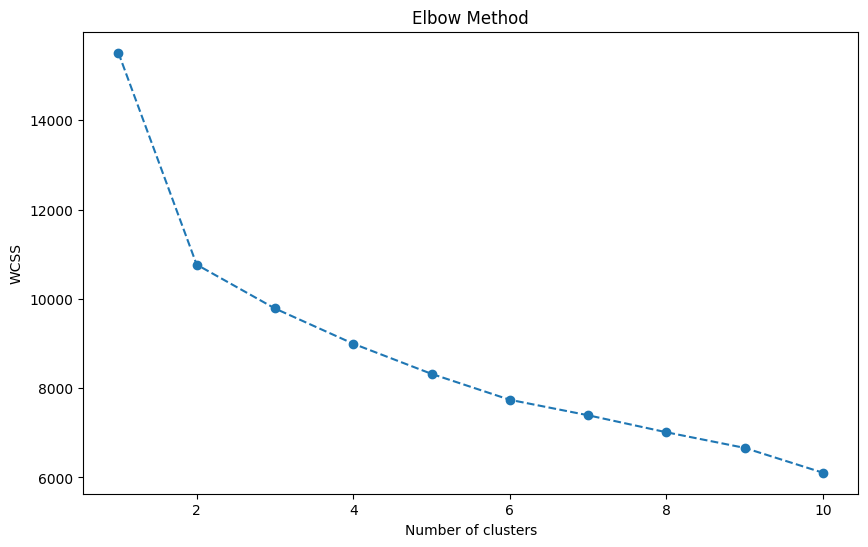

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# Apply K-Means clustering (let's choose 4 clusters based on the elbow plot)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters


In [36]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

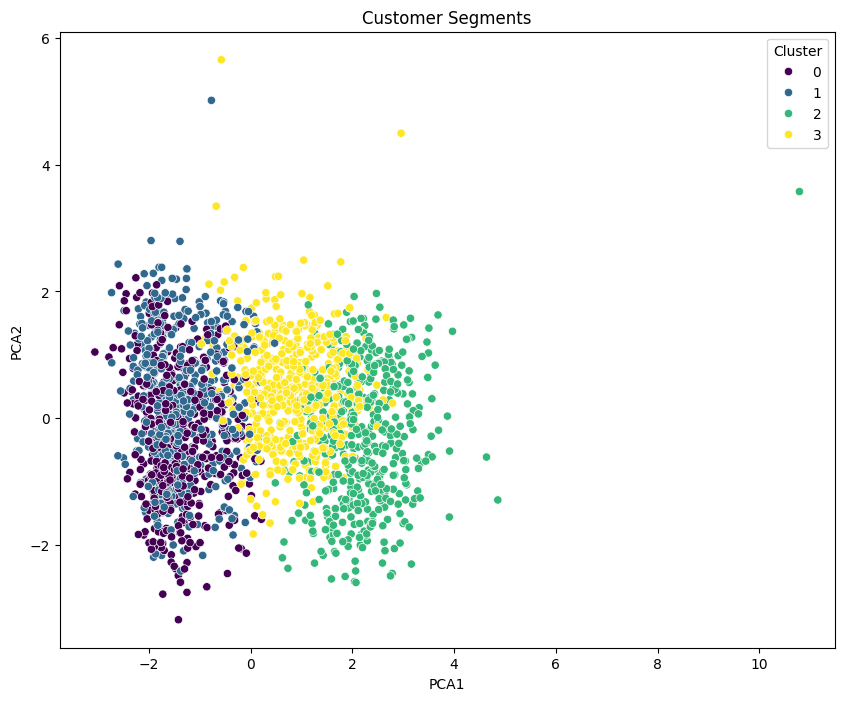

In [37]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

In [38]:
# Analyze clusters
cluster_analysis = df.groupby('Cluster')[cluster_features].mean()
print("\nCluster Analysis:")
print(cluster_analysis)


Cluster Analysis:
               Income  Total_Spending  Total_Purchases  Total_Children  \
Cluster                                                                  
0        34762.158537      121.695122         6.425087        1.179443   
1        37144.486014      139.540210         6.902098        1.318182   
2        78480.173410     1415.932563        19.630058        0.123314   
3        61431.168784      836.188748        18.154265        1.096189   

         Customer_Tenure        Age    Recency  
Cluster                                         
0             326.714286  51.968641  24.040070  
1             321.617133  55.340909  75.012238  
2             339.747592  55.196532  50.685934  
3             427.540835  62.362976  46.460980  


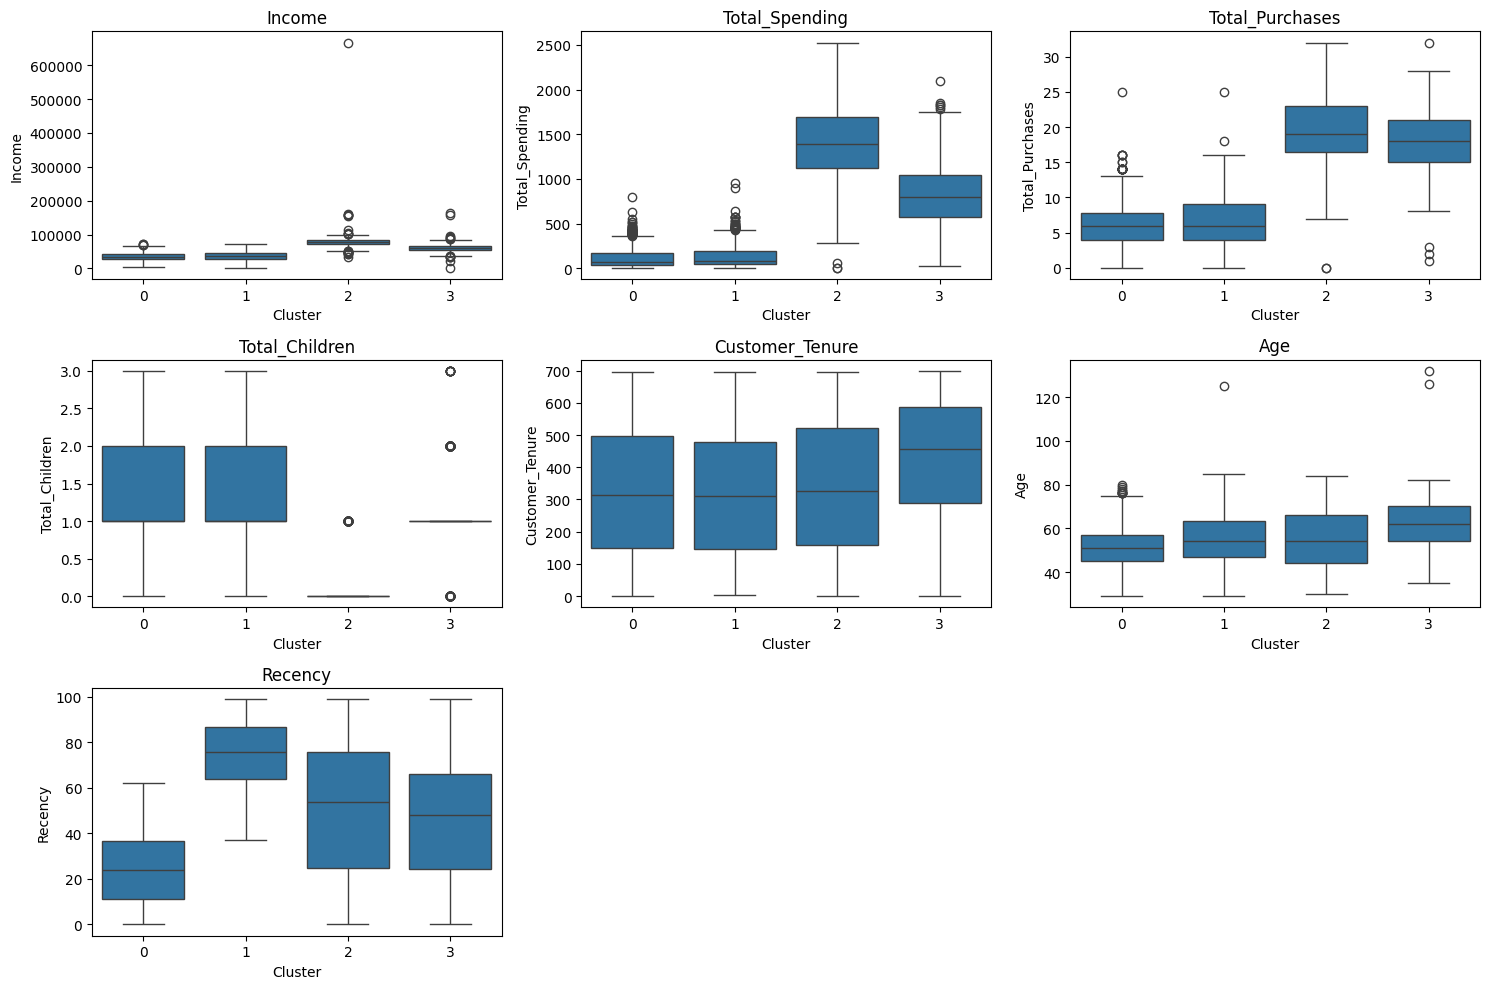

In [39]:
# Visualize cluster characteristics
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cluster_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='Cluster', y=feature)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [40]:
# Save the processed data
df.to_csv('customer_analysis_processed.csv', index=False)